Importando todo o necessário no desenvolvimento do exercício.

In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

Função para mostrar um gráfico de silhueta (com poucas modificações em relação ao disponível no scikit-learn).

In [2]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

def silhouette_plot(X, labels):
    fig = plt.figure()
    plt.title("Silhoutte plot")
    ax1 = plt.gca()
    ax1.set_xlim([-0.2, 1])
    n_clusters = np.unique(labels).shape[0]
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    y_lower = 10
    
    silhouette_avg = metrics.silhouette_score(X, labels)
    sample_silhouette_values = metrics.silhouette_samples(X, labels)
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = mpl.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

Carregando o csv, aplicando o PCA para deixar apenas 2 componentes.

Mostrando os vários tipos de queijo, a informação nutricional de cada um e os dados depois da redução de dimensionalidade.

In [3]:
queijos = np.loadtxt('queijo.csv', dtype=str, delimiter=",", skiprows=1, usecols=(0,))
dados = np.loadtxt('queijo.csv', dtype=float, delimiter=",", skiprows=1, usecols=range(1, 10))
dados_pca = PCA(n_components=2).fit_transform(dados)
print("Lista de queijos:",queijos,"\n")
print("calorias, sódio, cálcio, lipídios, retinol, folatos, proteínas, colesterol, magnésio\n")
print(dados,"\n")
print("Dados após a redução de dimensionalidade:\n", dados_pca)

Lista de queijos: ['CarredelEst' 'Babybel' 'Beaufort' 'Bleu' 'Camembert' 'Cantal'
 'Chabichou' 'Chaource' 'Cheddar' 'Comte' 'Coulomniers' 'Edam' 'Emmental'
 'Fr.chevrepatemolle' 'Fr.fondu.45' 'Fr.frais20nat.' 'Fr.frais40nat.'
 'Maroilles' 'Morbier' 'Parmesan' 'Petitsuisse40' 'PontlEveque' 'Pyrenees'
 'Reblochon' 'Rocquefort' 'SaintPaulin' 'Tome' 'Vacherin'
 'Yaourtlaitent.nat.'] 

calorias, sódio, cálcio, lipídios, retinol, folatos, proteínas, colesterol, magnésio

[[314.  353.5  72.6  26.3  51.6  30.3  21.   70.   20. ]
 [314.  238.  209.8  25.1  63.7   6.4  22.6  70.   27. ]
 [401.  112.  259.4  33.3  54.9   1.2  26.6 120.   41. ]
 [342.  336.  211.1  28.9  37.1  27.5  20.2  90.   27. ]
 [264.  314.  215.9  19.5 103.   36.4  23.4  60.   20. ]
 [367.  256.  264.   28.8  48.8   5.7  23.   90.   30. ]
 [344.  192.   87.2  27.9  90.1  36.3  19.5  80.   36. ]
 [292.  276.  132.9  25.4 116.4  32.5  17.8  70.   25. ]
 [406.  172.  182.3  32.5  76.4   4.9  26.  110.   28. ]
 [399.   92.  220

Dados depois de passarem por normalização.

In [4]:
dados_normalizados = preprocessing.scale(dados_pca)
print("Dados normalizados: \n",dados_normalizados)

Dados normalizados: 
 [[-0.75669631 -1.70205905]
 [-0.27121651  0.06154107]
 [-0.08687777  1.85278746]
 [-1.03142802 -0.39154195]
 [-0.477757   -0.76697019]
 [-0.75437847  0.66730275]
 [ 0.03459013 -0.36161024]
 [-0.27388447 -0.93463506]
 [-0.34016021  0.87456259]
 [ 0.10077156  1.71172085]
 [ 0.05039262 -0.79934047]
 [ 0.0960886   1.21338298]
 [ 0.28061013  2.40568092]
 [ 0.98119706 -1.1309986 ]
 [-1.02021806 -1.39027426]
 [ 2.28099613 -0.47511481]
 [ 2.25654176 -0.52252574]
 [-0.9068546  -0.03645037]
 [-0.75041556  0.02034163]
 [-0.83281669  1.31624659]
 [ 2.17876867 -0.48825431]
 [-0.02575868 -0.28384639]
 [-0.41580658  0.15132548]
 [-0.45568575 -0.23614916]
 [-1.69556513 -1.24487792]
 [-0.06938397  0.56016319]
 [-0.27265106 -0.57814632]
 [ 0.26368585  0.85074892]
 [ 1.91391235 -0.34300959]]


Aplicando o KMeans com 2 grupos.

Mostrando o coeficiente de silhueta, a classificação de cada grupo, o gráfico de silhueta e o gráfico com a classificação dos grupos.

Para 2 grupos, o coeficiente de silhueta é: 0.5065289835998389
Queijo, Grupo
('CarredelEst', 1)
('Babybel', 1)
('Beaufort', 1)
('Bleu', 1)
('Camembert', 1)
('Cantal', 1)
('Chabichou', 1)
('Chaource', 1)
('Cheddar', 1)
('Comte', 1)
('Coulomniers', 1)
('Edam', 1)
('Emmental', 1)
('Fr.chevrepatemolle', 0)
('Fr.fondu.45', 1)
('Fr.frais20nat.', 0)
('Fr.frais40nat.', 0)
('Maroilles', 1)
('Morbier', 1)
('Parmesan', 1)
('Petitsuisse40', 0)
('PontlEveque', 1)
('Pyrenees', 1)
('Reblochon', 1)
('Rocquefort', 1)
('SaintPaulin', 1)
('Tome', 1)
('Vacherin', 1)
('Yaourtlaitent.nat.', 0)


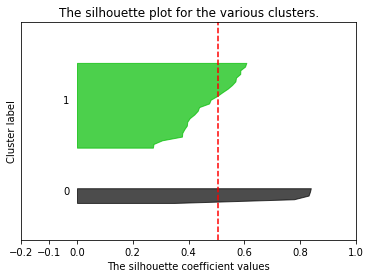

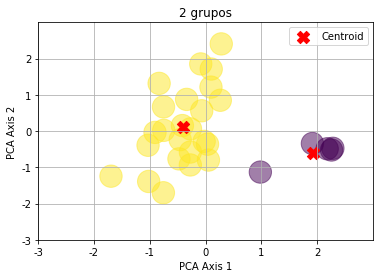

In [5]:
n_grupos = 2
s_medios = []

km2 = KMeans(n_clusters=n_grupos)
km2.fit(dados_normalizados)
y_pred2 = km2.predict(dados_normalizados)
s_medios.append(metrics.silhouette_score(dados_normalizados, y_pred2))
silhouette_plot(dados_normalizados, y_pred2)

c0=[]; c1=[];
for i in range(y_pred2.shape[0]):
    if y_pred2[i] == 0:
        c0.append(dados_normalizados[i])
    else:
        c1.append(dados_normalizados[i])
  
c0=np.array(c0)
c1=np.array(c1)
        
c0_cm = np.array([np.mean(c0[:,0]), np.mean(c0[:,1])])
c1_cm = np.array([np.mean(c1[:,0]), np.mean(c1[:,1])])

cm = np.vstack((c0_cm, c1_cm))

plt.figure()
plt.scatter(x=dados_normalizados[:, 0], y=dados_normalizados[:, 1], c=y_pred2, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xticks(range(-3,3), ['-3','-2','-1','0','1','2','3'])
plt.yticks(range(-3,3), ['-3','-2','-1','0','1','2','3'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title("%d grupos" % n_grupos)
plt.grid(True)
plt.scatter(x=cm[:,0], y=cm[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

print("Para", n_grupos, "grupos, o coeficiente de silhueta é:", metrics.silhouette_score(dados_normalizados, y_pred2))

print("Queijo, Grupo")
for t in zip(queijos, km2.labels_):
    print(t)

Aplicando o KMeans com 3 grupos.

Mostrando o coeficiente de silhueta, a classificação de cada grupo, o gráfico de silhueta e o gráfico com a classificação dos grupos.

Para 3 grupos, o coeficiente de silhueta é: 0.5295105133146627
Queijo, Grupo
('CarredelEst', 0)
('Babybel', 0)
('Beaufort', 2)
('Bleu', 0)
('Camembert', 0)
('Cantal', 2)
('Chabichou', 0)
('Chaource', 0)
('Cheddar', 2)
('Comte', 2)
('Coulomniers', 0)
('Edam', 2)
('Emmental', 2)
('Fr.chevrepatemolle', 1)
('Fr.fondu.45', 0)
('Fr.frais20nat.', 1)
('Fr.frais40nat.', 1)
('Maroilles', 0)
('Morbier', 0)
('Parmesan', 2)
('Petitsuisse40', 1)
('PontlEveque', 0)
('Pyrenees', 0)
('Reblochon', 0)
('Rocquefort', 0)
('SaintPaulin', 2)
('Tome', 0)
('Vacherin', 2)
('Yaourtlaitent.nat.', 1)


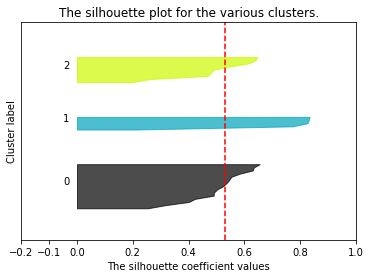

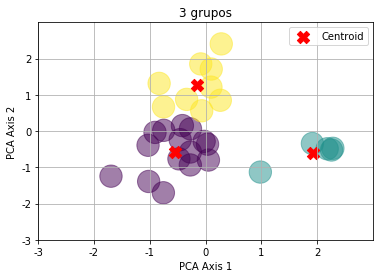

In [6]:
n_grupos = 3

km3 = KMeans(n_clusters=n_grupos)
km3.fit(dados_normalizados)
y_pred3 = km3.predict(dados_normalizados)
s_medios.append(metrics.silhouette_score(dados_normalizados, y_pred3))
silhouette_plot(dados_normalizados, y_pred3)

c0=[]; c1=[]; c2=[];
for i in range(y_pred3.shape[0]):
    if y_pred3[i] == 0:
        c0.append(dados_normalizados[i])
    elif y_pred3[i] == 1:
        c1.append(dados_normalizados[i])
    else:
        c2.append(dados_normalizados[i])


c0=np.array(c0)
c1=np.array(c1)
c2=np.array(c2)
        
c0_cm = np.array([np.mean(c0[:,0]), np.mean(c0[:,1])])
c1_cm = np.array([np.mean(c1[:,0]), np.mean(c1[:,1])])
c2_cm = np.array([np.mean(c2[:,0]), np.mean(c2[:,1])])

cm = np.vstack((c0_cm, c1_cm, c2_cm))

plt.figure()
plt.scatter(x=dados_normalizados[:, 0], y=dados_normalizados[:, 1], c=y_pred3, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xticks(range(-3,3), ['-3','-2','-1','0','1','2','3'])
plt.yticks(range(-3,3), ['-3','-2','-1','0','1','2','3'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title("%d grupos" % n_grupos)
plt.grid(True)
plt.scatter(x=cm[:,0], y=cm[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

print("Para", n_grupos, "grupos, o coeficiente de silhueta é:", metrics.silhouette_score(dados_normalizados, y_pred3))

print("Queijo, Grupo")
for t in zip(queijos, km3.labels_):
    print(t)

Aplicando o KMeans com 4 grupos.

Mostrando o coeficiente de silhueta, a classificação de cada grupo, o gráfico de silhueta e o gráfico com a classificação dos grupos.

Para 4 grupos, o coeficiente de silhueta é: 0.4969836413143129
Queijo, Grupo
('CarredelEst', 0)
('Babybel', 1)
('Beaufort', 2)
('Bleu', 1)
('Camembert', 1)
('Cantal', 2)
('Chabichou', 1)
('Chaource', 1)
('Cheddar', 2)
('Comte', 2)
('Coulomniers', 1)
('Edam', 2)
('Emmental', 2)
('Fr.chevrepatemolle', 3)
('Fr.fondu.45', 0)
('Fr.frais20nat.', 3)
('Fr.frais40nat.', 3)
('Maroilles', 1)
('Morbier', 1)
('Parmesan', 2)
('Petitsuisse40', 3)
('PontlEveque', 1)
('Pyrenees', 1)
('Reblochon', 1)
('Rocquefort', 0)
('SaintPaulin', 2)
('Tome', 1)
('Vacherin', 2)
('Yaourtlaitent.nat.', 3)


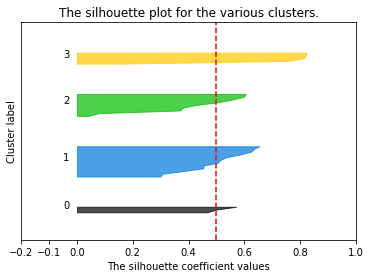

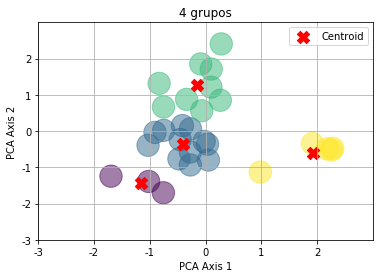

In [7]:
n_grupos = 4

km4 = KMeans(n_clusters=n_grupos)
km4.fit(dados_normalizados)
y_pred4 = km4.predict(dados_normalizados)
s_medios.append(metrics.silhouette_score(dados_normalizados, y_pred4))
silhouette_plot(dados_normalizados, y_pred4)

c0=[]; c1=[]; c2=[]; c3=[];
for i in range(y_pred4.shape[0]):
    if y_pred4[i] == 0:
        c0.append(dados_normalizados[i])
    elif y_pred4[i] == 1:
        c1.append(dados_normalizados[i])
    elif y_pred4[i] == 2:
        c2.append(dados_normalizados[i])
    else:
        c3.append(dados_normalizados[i])

        
c0=np.array(c0)
c1=np.array(c1)
c2=np.array(c2)
c3=np.array(c3)
        
c0_cm = np.array([np.mean(c0[:,0]), np.mean(c0[:,1])])
c1_cm = np.array([np.mean(c1[:,0]), np.mean(c1[:,1])])
c2_cm = np.array([np.mean(c2[:,0]), np.mean(c2[:,1])])
c3_cm = np.array([np.mean(c3[:,0]), np.mean(c3[:,1])])

cm = np.vstack((c0_cm, c1_cm, c2_cm, c3_cm))

plt.figure()
plt.scatter(x=dados_normalizados[:, 0], y=dados_normalizados[:, 1], c=y_pred4, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xticks(range(-3,3), ['-3','-2','-1','0','1','2','3'])
plt.yticks(range(-3,3), ['-3','-2','-1','0','1','2','3'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title("%d grupos" % n_grupos)
plt.grid(True)
plt.scatter(x=cm[:,0], y=cm[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

print("Para", n_grupos, "grupos, o coeficiente de silhueta é:", metrics.silhouette_score(dados_normalizados, y_pred4))

print("Queijo, Grupo")
for t in zip(queijos, km4.labels_):
    print(t)

Aplicando o KMeans com 5 grupos.

Mostrando o coeficiente de silhueta, a classificação de cada grupo, o gráfico de silhueta e o gráfico com a classificação dos grupos.

Para 5 grupos, o coeficiente de silhueta é: 0.46670532925612257
Queijo, Grupo
('CarredelEst', 1)
('Babybel', 3)
('Beaufort', 4)
('Bleu', 3)
('Camembert', 3)
('Cantal', 0)
('Chabichou', 3)
('Chaource', 3)
('Cheddar', 0)
('Comte', 4)
('Coulomniers', 3)
('Edam', 0)
('Emmental', 4)
('Fr.chevrepatemolle', 2)
('Fr.fondu.45', 1)
('Fr.frais20nat.', 2)
('Fr.frais40nat.', 2)
('Maroilles', 3)
('Morbier', 3)
('Parmesan', 0)
('Petitsuisse40', 2)
('PontlEveque', 3)
('Pyrenees', 3)
('Reblochon', 3)
('Rocquefort', 1)
('SaintPaulin', 0)
('Tome', 3)
('Vacherin', 0)
('Yaourtlaitent.nat.', 2)


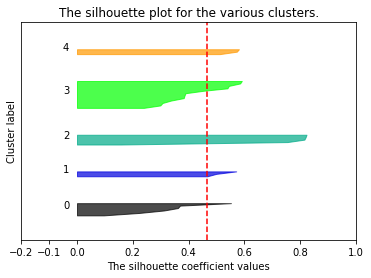

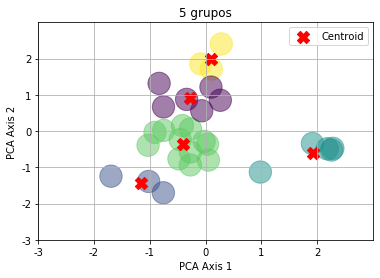

In [8]:
n_grupos = 5

km5 = KMeans(n_clusters=n_grupos)
km5.fit(dados_normalizados)
y_pred5 = km5.predict(dados_normalizados)
s_medios.append(metrics.silhouette_score(dados_normalizados, y_pred5))
silhouette_plot(dados_normalizados, y_pred5)

c0=[]; c1=[]; c2=[]; c3=[]; c4=[];
for i in range(y_pred5.shape[0]):
    if y_pred5[i] == 0:
        c0.append(dados_normalizados[i])
    elif y_pred5[i] == 1:
        c1.append(dados_normalizados[i])
    elif y_pred5[i] == 2:
        c2.append(dados_normalizados[i])
    elif y_pred5[i] == 3:
        c3.append(dados_normalizados[i])
    else:
        c4.append(dados_normalizados[i])
        
c0=np.array(c0)
c1=np.array(c1)
c2=np.array(c2)
c3=np.array(c3)
c4=np.array(c4)
        
c0_cm = np.array([np.mean(c0[:,0]), np.mean(c0[:,1])])
c1_cm = np.array([np.mean(c1[:,0]), np.mean(c1[:,1])])
c2_cm = np.array([np.mean(c2[:,0]), np.mean(c2[:,1])])
c3_cm = np.array([np.mean(c3[:,0]), np.mean(c3[:,1])])
c4_cm = np.array([np.mean(c4[:,0]), np.mean(c4[:,1])])

cm = np.vstack((c0_cm, c1_cm, c2_cm, c3_cm, c4_cm))

plt.figure()
plt.scatter(x=dados_normalizados[:, 0], y=dados_normalizados[:, 1], c=y_pred5, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xticks(range(-3,3), ['-3','-2','-1','0','1','2','3'])
plt.yticks(range(-3,3), ['-3','-2','-1','0','1','2','3'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title("%d grupos" % n_grupos)
plt.grid(True)
plt.scatter(x=cm[:,0], y=cm[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

print("Para", n_grupos, "grupos, o coeficiente de silhueta é:", metrics.silhouette_score(dados_normalizados, y_pred5))

print("Queijo, Grupo")
for t in zip(queijos, km5.labels_):
    print(t)

O melhor resultado foi o com 3 grupos.

In [9]:
print(s_medios)

[0.5065289835998389, 0.5295105133146627, 0.4969836413143129, 0.46670532925612257]


Gambiarra para usar KFold.

Dividi os dados em 4 partes.

Como não existia um y_target, utilizei o y_pred com 3 grupos como target, então rodei o KMeans para 3 grupos, mas o resultado foi ruim.

In [10]:
kf = KFold(n_splits=4)
y_pred_kf = []
n_grupos = 3

for train_index, test_index in kf.split(dados_normalizados):
    x_train, x_test = dados_normalizados[train_index], dados_normalizados[test_index]
    y_train, y_test = y_pred3[train_index], y_pred3[test_index]
    km = KMeans(n_clusters=n_grupos)
    km.fit(x_train)
    #km2 = KMeans(n_clusters=n_grupos)
    #km2.fit(x_test)
    y_pred = km.predict(x_test)
    print(y_test, "grupo real")
    print(y_pred, "grupo com knn")
    ac = accuracy_score(y_pred, y_test)
    y_pred_kf.append(ac)
    
    
print("\nScores de cada fold:", y_pred_kf, "\n")
print("Média:",round(np.median(y_pred_kf),3))

[0 0 2 0 0 2 0 0] grupo real
[2 2 0 2 2 0 2 2] grupo com knn
[2 2 0 2 2 1 0] grupo real
[1 1 2 1 1 0 2] grupo com knn
[1 1 0 0 2 1 0] grupo real
[0 0 1 1 2 0 1] grupo com knn
[0 0 0 2 0 2 1] grupo real
[0 0 0 1 0 1 2] grupo com knn

Scores de cada fold: [0.0, 0.0, 0.14285714285714285, 0.5714285714285714] 

Média: 0.071


Usando AffinityPropagation, mostrando a posição dos centróides e as predições.

In [11]:
ap = AffinityPropagation()
ap.fit(dados_normalizados)
print("Posição dos centróides:\n", ap.cluster_centers_)
y_pred_ap = ap.predict(dados_normalizados)
print("\nPredição dos dados:\n", y_pred_ap)
print("\nUsando Affinity Propagation o coeficiente de silhueta foi:", metrics.silhouette_score(dados_normalizados, y_pred_ap))

Posição dos centróides:
 [[-0.34016021  0.87456259]
 [ 0.10077156  1.71172085]
 [-1.02021806 -1.39027426]
 [-0.45568575 -0.23614916]
 [ 1.91391235 -0.34300959]]

Predição dos dados:
 [2 3 1 3 3 0 3 3 0 1 3 1 1 4 2 4 4 3 3 0 4 3 3 3 2 0 3 0 4]

Usando Affinity Propagation o coeficiente de silhueta foi: 0.4406167790408299


Mostrando o gráfico com os centroides desse método.

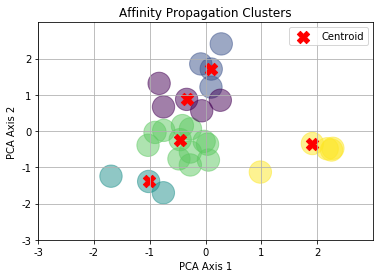

In [12]:
plt.figure()
plt.scatter(x=dados_normalizados[:, 0], y=dados_normalizados[:, 1], c=y_pred_ap, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.xticks(range(-3,3), ['-3','-2','-1','0','1','2','3'])
plt.yticks(range(-3,3), ['-3','-2','-1','0','1','2','3'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Affinity Propagation Clusters')
plt.grid(True)

plt.scatter(x=ap.cluster_centers_[:,0], y=ap.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Discussão sobre os resultados

Os queijos foram agrupados de acordo com suas informações nutricionais. Usando o coeficiente de silhueta como métrica, o KMeans com 3 grupos foi o algoritmo com melhor desempenho. Como os dados originais sofreram redução de dimensionalidade e normalização, não dá para tirar alguma conclusão a partir deles, no entanto, sabendo a qual grupo cada queijo pertence, é possível usar os dados originais para extrair informações, como por exemplo:

In [13]:
print("Queijos com menor quantidade de calorias (índice 0) e lipídeos (índice 3):")
print(queijos[15], y_pred3[15], dados[15])
print(queijos[16], y_pred3[16], dados[16])
print(queijos[28], y_pred3[28], dados[28])

print("\nQueijos com maior quantidade de calorias (índice 0) e lipídeos (índice 3):")
print(queijos[2], y_pred3[2], dados[2])
print(queijos[8], y_pred3[8], dados[8])
print(queijos[9], y_pred3[9], dados[9])

Queijos com menor quantidade de calorias (índice 0) e lipídeos (índice 3):
Fr.frais20nat. 1 [ 80.   41.  146.3   3.5  50.   20.    8.3  10.   11. ]
Fr.frais40nat. 1 [115.   25.   94.8   7.8  64.3  22.6   7.   30.   10. ]
Yaourtlaitent.nat. 1 [ 70.   91.  215.7   3.4  42.9   2.9   4.1  13.   14. ]

Queijos com maior quantidade de calorias (índice 0) e lipídeos (índice 3):
Beaufort 2 [401.  112.  259.4  33.3  54.9   1.2  26.6 120.   41. ]
Cheddar 2 [406.  172.  182.3  32.5  76.4   4.9  26.  110.   28. ]
Comte 2 [399.   92.  220.5  32.4  55.9   1.3  29.2 120.   51. ]


Assim é possível inferir características dos grupos 1 e 2: os do grupo 1 tem menos calorias e gordura, os do grupo 2 tem mais e os do grupo 0 parecem ser intermediários. Também seria possíver ver a qual grupo pertencem os queijos que tem mais proteínas, os que tem mais sódio, etc., assim caracterizar cada grupo.

In [14]:
idk = np.argsort(km3.labels_)

queijos_ord = queijos[idk]
grupos_ord = km3.labels_[idk]

print("Grupo, Queijo")
for q, g in zip(queijos_ord, grupos_ord):
    print(q, g)

Grupo, Queijo
CarredelEst 0
Tome 0
Rocquefort 0
Reblochon 0
Pyrenees 0
PontlEveque 0
Morbier 0
Maroilles 0
Coulomniers 0
Fr.fondu.45 0
Babybel 0
Chaource 0
Chabichou 0
Bleu 0
Camembert 0
Yaourtlaitent.nat. 1
Fr.chevrepatemolle 1
Fr.frais20nat. 1
Fr.frais40nat. 1
Petitsuisse40 1
SaintPaulin 2
Beaufort 2
Cheddar 2
Comte 2
Vacherin 2
Emmental 2
Edam 2
Cantal 2
Parmesan 2
